# 使用PCA进行降噪

In [2]:
import numpy as  np
import matplotlib.pyplot as plt

In [4]:
X = np.empty((100,2))
X   #这一步是在内存中给X开辟出位置

array([[  0.00000000e+000,   3.16202013e-322],
       [  9.84207525e-315,   9.88131292e-323],
       [  0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000],
       [  6.20528100e-179,   1.29729467e-311],
       [  1.29729467e-311,   1.83585079e-280],
       [  0.00000000e+000,   0.00000000e+000],
       [  3.69858371e-027,   0.00000000e+000],
       [  0.00000000e+000,  -2.77110842e+160],
       [  0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   1.27594772e+231],
       [  1.29729467e-311,   1.29729468e-311],
       [ -1.51063483e+223,   0.00000000e+000],
       [  0.00000000e+000,   1.88726669e-138],
       [  0.00000000e+000,   0.00000000e+000],
       [ -1.65775894e-257,   0.00000000e+000],
       [  0.00000000e+000,   6.24104266e-049],
       [  1.29729468e-311,   1.29729477e-311],
       [ -6.64255658e-056,   1.29729467e-311],
       [  1.2

In [18]:
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = X[:,0]*0.75 + 3. + np.random.normal(0,5,size=100)

In [19]:
X

array([[ 10.7259292 ,  21.25774512],
       [ 55.81503803,  45.6961275 ],
       [ 62.30026669,  54.28969433],
       [ 99.60247214,  78.10788688],
       [ 70.82724945,  44.22713636],
       [ 21.61313801,  17.96920022],
       [ 71.32037773,  56.76300319],
       [ 56.76175005,  42.6584392 ],
       [  6.24248434,  21.64201632],
       [ 17.08583053,  19.30494632],
       [ 15.26077725,  14.65471935],
       [ 47.3947021 ,  39.76195862],
       [ 83.7272919 ,  59.71904128],
       [ 68.81444463,  50.65204778],
       [ 66.57647512,  61.2454516 ],
       [ 97.67344464,  70.94698274],
       [ 29.45790885,  26.88255378],
       [ 35.25702303,  34.18010778],
       [ 60.76689902,  44.8241113 ],
       [ 49.98419991,  38.33046153],
       [ 34.97302418,  26.93897132],
       [ 75.3709834 ,  59.37202791],
       [ 86.05185405,  66.70416374],
       [ 44.87444967,  41.54359182],
       [ 73.0704232 ,  50.85818796],
       [ 86.99024219,  64.74881365],
       [ 66.39746498,  52.4523598 ],
 

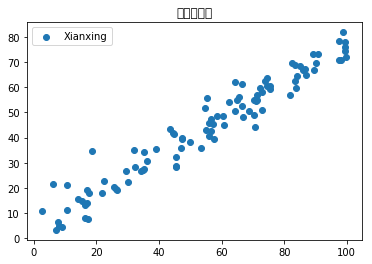

In [25]:
# -*- coding: GBK -*-
plt.scatter(X[:,0],X[:,1],label='Xianxing')
plt.title('线性的粒子')
plt.legend()
plt.show()

In [26]:
#我们可不可以这样认为   这数据本身就是一条直线  但是我们的测量仪器 或者测量人员自己
#的原因导致我们的数据成为这样的形状或者我们测量的手段是有问题的

In [27]:
from sklearn.decomposition import  PCA

In [28]:
pca =PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

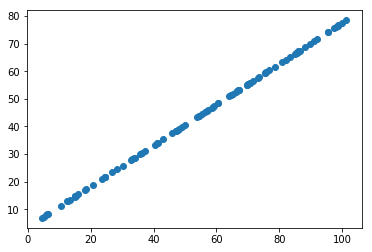

In [29]:
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.show()

In [30]:
#我们可以将这个过程是将数据的噪音给去除了   但是我们不能说这样的数据全都是噪音
#所以总体而言  我们还是倾向于我们丢失了信息  ，但是我们丢失的信息很有可能有很大一部分分是
# 丢失的噪音

## 手写数字识别

In [31]:
from sklearn import datasets

In [32]:
digits = datasets.load_digits()

In [33]:
X = digits.data
y = digits.target

In [34]:
#添加噪音矩阵
noisy_digits = X + np.random.normal(0,4,size=X.shape)

In [37]:
example_digits = noisy_digits[y==0,:][:10] #取出y=0的所有值的前10行
for num in range(1,10):
    X_num  = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits,X_num])  #进行列拼接

In [38]:
example_digits.shape

(100, 64)

In [45]:
#手写数字图片
def plot_digits(data):
    fig, axes =plt.subplots(10,10,figsize=(10,10),
                          subplot_kw={'xticks':[],'yticks':[]},
                          gridspec_kw=dict(hspace=0.1,wspace=0.1)
                          )
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary',interpolation='nearest',
                 clim=(0,16)
                 )
    plt.show()

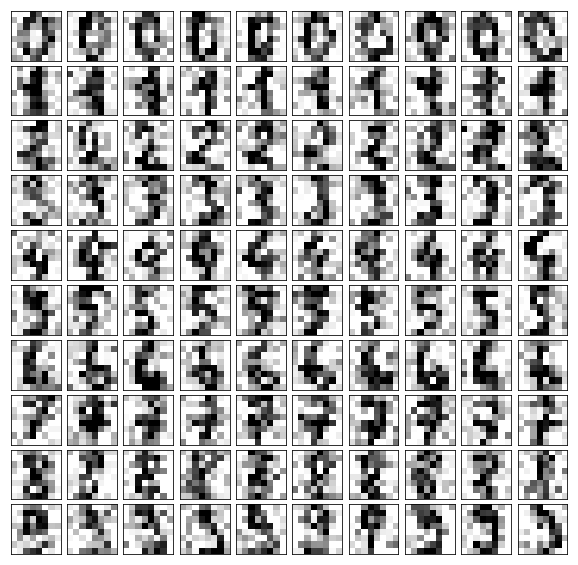

In [46]:
plot_digits(example_digits)

In [48]:
#我们可以看出噪音非常大
#我们用PCA进行降噪

In [49]:
from sklearn.decomposition import PCA

In [74]:
pca =PCA(0.6)

In [80]:
pca.fit(noisy_digits)
example_digits_reduction = pca.transform(example_digits)

In [82]:
pca.n_components

0.6

In [83]:
pca.n_components_

18

In [84]:
example_digits_reduction.shape

(100, 18)

In [85]:
example_digits_rs = pca.inverse_transform(example_digits_reduction)

In [86]:
example_digits_rs.shape

(100, 64)

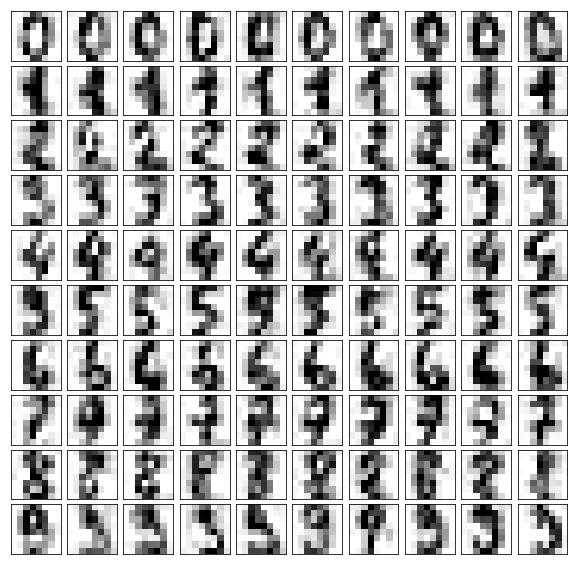

In [87]:
plot_digits(example_digits_rs)